In [1]:
import tweepy # for Twitter's API
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

# Reproduced from: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

In [2]:
# Twitter App access keys for the Twitter API
# Don't show your keys to anyone!

# Consume:
CONSUMER_KEY    = 'consumer_key'
CONSUMER_SECRET = 'consumer_secret'

# Access:
ACCESS_TOKEN  = 'access_token'
ACCESS_SECRET = 'access_secret'

In [3]:
# set up the twitter API

def twitter_setup():
    
    # Authentication and access using user-specific keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication
    api = tweepy.API(auth)
    return api

In [31]:
# Thanks to https://gist.github.com/yanofsky/5436496 for the code on how to fetch as many tweets as possible
# However, the Twitter API limits you to the latest ~ 3240 tweets

# Create object to get tweets
get_tweets = twitter_setup()

tweets = []

# Get most recent 200 tweets and print
new_tweets = get_tweets.user_timeline(screen_name = "JustinTrudeau", count = 1)

tweets.extend(new_tweets)

# Save the id of the oldest tweet, less one
oldest = tweets[-1].id - 1

# Keep getting tweets until there are no more- or in this case, until we reach teh limit
while len(new_tweets) > 0:

    # All subsequent requests use the max_id parameter, to prevent getting duplicates
    new_tweets = get_tweets.user_timeline(screen_name = "JustinTrudeau", count = 200, max_id = oldest)
    
    # Save most recent
    tweets.extend(new_tweets)
    
    # Update id of the oldest tweet, less one
    oldest = tweets[-1].id - 1
    
    print("...%s tweets downloaded so far" % (len(tweets)))

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Print most recent just to check
print("Most recent 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

...201 tweets downloaded so far
...401 tweets downloaded so far
...601 tweets downloaded so far
...801 tweets downloaded so far
...1001 tweets downloaded so far
...1201 tweets downloaded so far
...1401 tweets downloaded so far
...1601 tweets downloaded so far
...1801 tweets downloaded so far
...2001 tweets downloaded so far
...2201 tweets downloaded so far
...2401 tweets downloaded so far
...2601 tweets downloaded so far
...2801 tweets downloaded so far
...3001 tweets downloaded so far
...3201 tweets downloaded so far
...3211 tweets downloaded so far
...3211 tweets downloaded so far
Number of tweets extracted: 3211.

Most recent 5 tweets:

This afternoon, I spoke with @POTUS Trump to offer condolences for last night’s horrific shooting in Las Vegas: https://t.co/VjOO8FwZQF

Cet après-midi, j’ai offert mes condoléances au @POTUS Trump, après la terrible fusillade d’hier soir à Las Vegas : https://t.co/hDbPGBmNKX

Julie Payette represents the best of what it means to be Canadian. Join me

In [36]:
# Create pandas dataframe to store the tweets
data_temp = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ["Tweets"])

# Can print info about the tweets: id, created_at, source, favorite_count, retweet_count, geo, coordinates, entities
data_temp['Length']  = np.array([len(tweet.text) for tweet in tweets])
data_temp['Date'] = np.array([tweet.created_at for tweet in tweets])
data_temp['Source'] = np.array([tweet.source for tweet in tweets])
data_temp['Favourites']  = np.array([tweet.favorite_count for tweet in tweets])
data_temp['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Display of first 10 elements from dataframe:
display(data_temp.head(10))

,Tweets,Length,Date,Source,Favourites,RTs
0,"This afternoon, I spoke with @POTUS Trump to o...",135,2017-10-02 19:38:20,Twitter Web Client,2890,590
1,"Cet après-midi, j’ai offert mes condoléances a...",139,2017-10-02 19:37:40,Twitter Web Client,299,59
2,Julie Payette represents the best of what it m...,139,2017-10-02 18:46:57,Twitter Web Client,1271,342
3,Julie Payette représente le Canada à son meill...,140,2017-10-02 18:45:21,Twitter Web Client,296,68
4,Our hearts go out to those affected by last ni...,135,2017-10-02 17:46:51,Twitter Web Client,3289,851
5,Nous pensons fort aux victimes de la fusillade...,137,2017-10-02 17:46:14,Twitter Web Client,350,87
6,RT @RideauHall: Here are #GGDJuliePayette’s co...,105,2017-10-02 15:16:56,Twitter Web Client,0,612
7,RT @RideauHall: Voici les armoiries de #GGDJul...,107,2017-10-02 15:16:49,Twitter Web Client,0,72
8,"RT @GGJuliePayette: Dear Canadians, friends fr...",140,2017-10-02 15:07:42,Twitter Web Client,0,456
9,"RT @GGJuliePayette: Chers Canadiens, amis d'ic...",140,2017-10-02 15:07:38,Twitter Web Client,0,76


In [37]:
# Two things to do:
# First, get rid of any retweets- we're more interested in what Trudeau actually tweets himself
# Second, we need to filter into English and French

# 1. Get rid of retweets
def remove_retweets(df):
    return df[df.Tweets.str.contains("RT") == False]

# Get rid of RTs
data_no_rt = remove_retweets(data_temp)

# 2. Detect language
from langdetect import detect_langs

def isEnglish(string):
    string_ = detect_langs(string)
    for item in string_:
        if item.lang == "en":
            return True
    return False

def isFrench(string):
    string_ = detect_langs(string)
    for item in string_:
        if item.lang == "fr":
            return True
    return False

# Method to get English or French tweets
def get_en(df):
    return df[df['Tweets'].apply(isEnglish) == True]
def get_fr(df):
    return df[df['Tweets'].apply(isFrench) == True]

# Now let's actually separate the tweets into our final data frames
data_en = get_en(data_no_rt)
data_fr = get_fr(data_no_rt)
display(data_en.head(5))
display(data_fr.head(5))

,Tweets,Length,Date,Source,Favourites,RTs
0,"This afternoon, I spoke with @POTUS Trump to o...",135,2017-10-02 19:38:20,Twitter Web Client,2890,590
2,Julie Payette represents the best of what it m...,139,2017-10-02 18:46:57,Twitter Web Client,1271,342
4,Our hearts go out to those affected by last ni...,135,2017-10-02 17:46:51,Twitter Web Client,3289,851
12,Words fail this morning. The friendship &amp; ...,127,2017-10-02 13:03:32,Twitter Web Client,83841,16734
14,October is Women’s History Month - a time to c...,140,2017-10-02 00:42:18,Twitter for iPhone,3430,1181


,Tweets,Length,Date,Source,Favourites,RTs
1,"Cet après-midi, j’ai offert mes condoléances a...",139,2017-10-02 19:37:40,Twitter Web Client,299,59
3,Julie Payette représente le Canada à son meill...,140,2017-10-02 18:45:21,Twitter Web Client,296,68
5,Nous pensons fort aux victimes de la fusillade...,137,2017-10-02 17:46:14,Twitter Web Client,350,87
13,"Les mots nous manquent, ce matin. Les Canadien...",138,2017-10-02 13:03:14,Twitter Web Client,3081,1005
15,C’est le mois de l’Histoire des femmes - céléb...,124,2017-10-02 00:40:41,Twitter for iPhone,463,168


In [39]:
# Now that we've removed the retweets and sorted the tweets into English and French, we can do some exploratory data analysis

# First get mean length
mean_en = np.mean(data_en['Length'])
mean_fr = np.mean(data_fr['Length'])
print("Average tweet length in English: {}".format(mean_en))
print("Average tweet length in French: {}".format(mean_fr))

Average tweet length in English: 127.3526119402985
Average tweet length in French: 131.81463414634146


In [44]:
# Next let's look at tweets with most faves and RTs
# Write method to make it prettier :) 

def get_faves_rts(data, language):
    max_faves = np.max(data["Favourites"])
    max_rt = np.max(data["RTs"])
    favourites = data[data.Favourites == max_faves].index[0]
    rt = data[data.RTs == max_rt].index[0]
    print("The tweet with the most favourites in " + language + " is: \n{}".format(data['Tweets'][favourites]))
    print("Number of favourites: {}".format(max_faves))
    print("{} characters.\n".format(data['Length'][favourites]))
    print("The tweet with the most retweets in " + language + " is: \n{}".format(data['Tweets'][rt]))
    print("Number of retweets: {}".format(max_rt))
    print("{} characters.\n".format(data['Length'][rt]))
    
get_faves_rts(data_en, "English")
get_faves_rts(data_fr, "French")

The tweet with the most favourites in English is: 
To those fleeing persecution, terror &amp; war, Canadians will welcome you, regardless of your faith. Diversity is our strength #WelcomeToCanada
Number of likes: 772813
144 characters.

The tweet with the most retweets in English is: 
To those fleeing persecution, terror &amp; war, Canadians will welcome you, regardless of your faith. Diversity is our strength #WelcomeToCanada
Number of retweets: 420965
144 characters.

The tweet with the most favourites in French is: 
L'amour, c'est l'amour. #PrideTO https://t.co/5ofOM25U94
Number of likes: 28302
56 characters.

The tweet with the most retweets in French is: 
À ceux qui fuient la persécution, la terreur et la guerre, sachez que le Canada vous accueillera...
Number of retweets: 20017
99 characters.



In [45]:
# Use fivethirtyeight style plots
import matplotlib.style as style
style.use('fivethirtyeight')

In [46]:
# Look at the length, likes, and RT's as a time series

# English
tlen_en = pd.Series(data = data_en['Length'].values, index = data_en['Date'])
tlikes_en = pd.Series(data = data_en['Favourites'].values, index = data_en['Date'])
trt_en = pd.Series(data = data_en['RTs'].values, index = data_en['Date'])
# French
tlen_fr = pd.Series(data = data_fr['Length'].values, index = data_fr['Date'])
tlikes_fr = pd.Series(data = data_fr['Favourites'].values, index = data_fr['Date'])
trt_fr = pd.Series(data = data_fr['RTs'].values, index = data_fr['Date'])

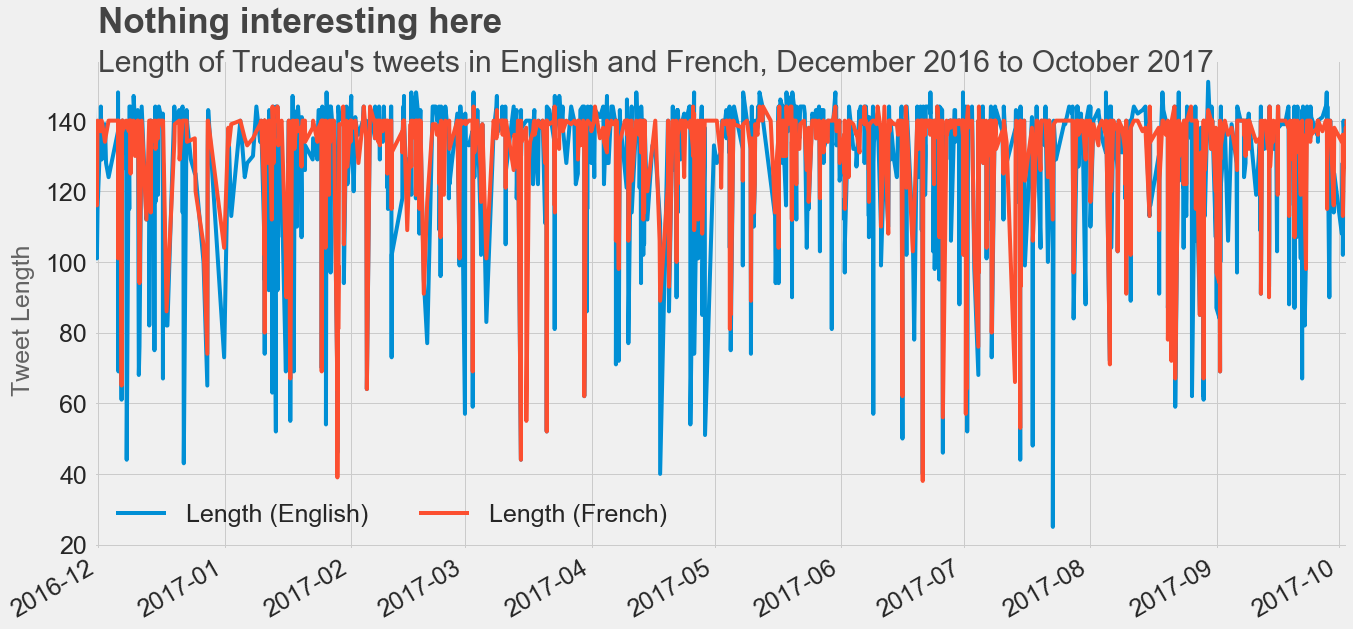

In [47]:
# Now let's look at the length of tweets
# Let's make a time series

tlen_plot = tlen_en.plot(figsize = (20,10), label = "Length (English)", legend = True)
tlen_fr.plot(figsize = (20,10), label = "Length (French)", legend = True, ax = tlen_plot)
tlen_plot.text(x = "2016-12", y = 165, s = "Nothing interesting here", fontsize = 35, alpha = 0.85, weight = "bold")
tlen_plot.text(x = "2016-12", y = 154,
               s = "Length of Trudeau's tweets in English and French, December 2016 to October 2017 ",
               fontsize = 30, alpha = 0.85 )
tlen_plot.tick_params(labelsize = 25)
tlen_plot.text(x = "2016-11-10", y = 100, s = "Tweet Length", fontsize = 25, rotation = "vertical", alpha = 0.7)
tlen_plot.legend(fontsize = 25, loc = 3, ncol = 2)
tlen_plot.xaxis.label.set_visible(False)

There's nothing that jumps out at me about the length of the tweets in English and French. Next let's look at favourites and retweets.

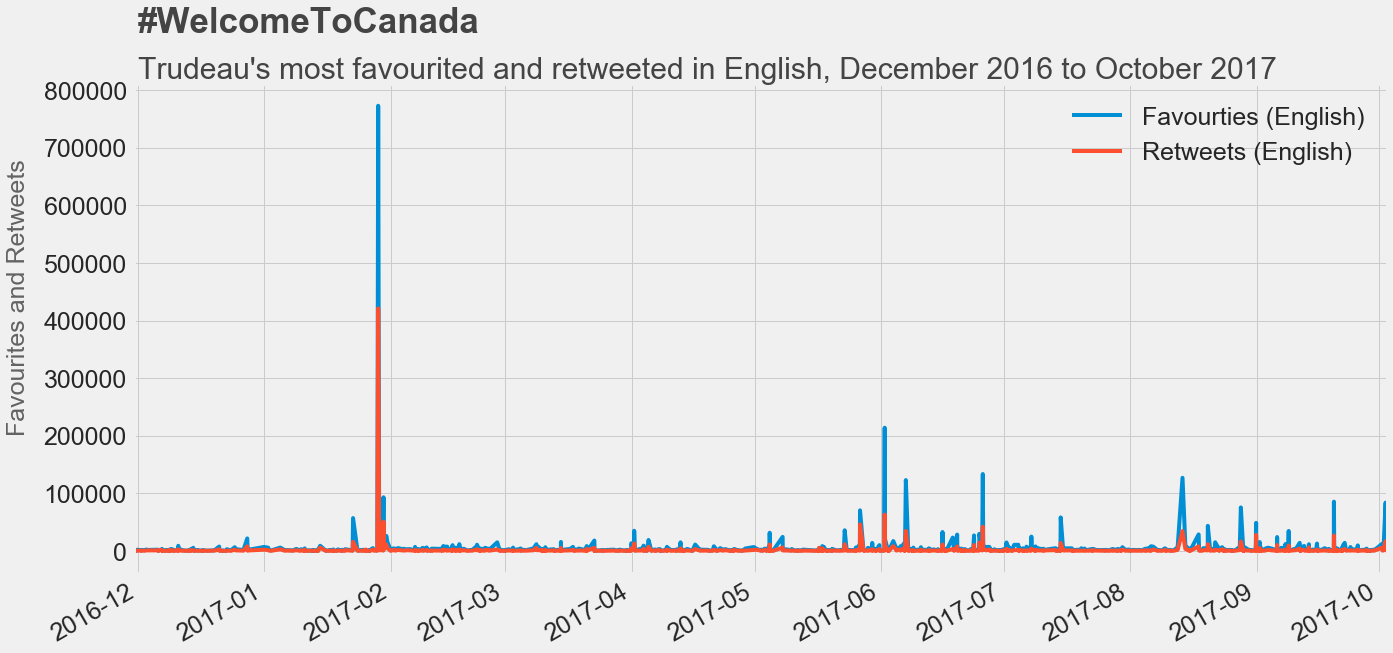

In [48]:
# Due to the huge discrepency in activity bewteen the English and French tweets, 
# I'll plot the English favourites and retweets together

t_en_plot = tlikes_en.plot(figsize = (20,10), label = "Favourties (English)", legend = True)
trt_en.plot(figsize = (20,10), label = "Retweets (English)", legend = True, ax = t_en_plot)
t_en_plot.text(x = "2016-12", y = 900000, s = "#WelcomeToCanada",
                 fontsize = 35, alpha = 0.85, weight = "bold")
t_en_plot.text(x = "2016-12", y = 820000,
               s = "Trudeau's most favourited and retweeted in English, December 2016 to October 2017",
               fontsize = 30, alpha = 0.85 )
t_en_plot.tick_params(labelsize = 25)
t_en_plot.text(x = "2016-10-30", y = 650000, s = "Favourites and Retweets", fontsize = 25, rotation = "vertical", alpha = 0.7)
t_en_plot.legend(fontsize = 25, loc = 1, ncol = 1)
t_en_plot.xaxis.label.set_visible(False)

We knew from above that the tweet with the most retweets and favourites was "To those fleeing persecution, terror & war, Canadians will welcome you, regardless of your faith. Diversity is our strength #WelcomeToCanada," with 772813 favourites, and 420965 retweets. What wasn't clear, though, was how much more action this particular tweet got! I'd say this says something about Canadians- we're very welcoming!

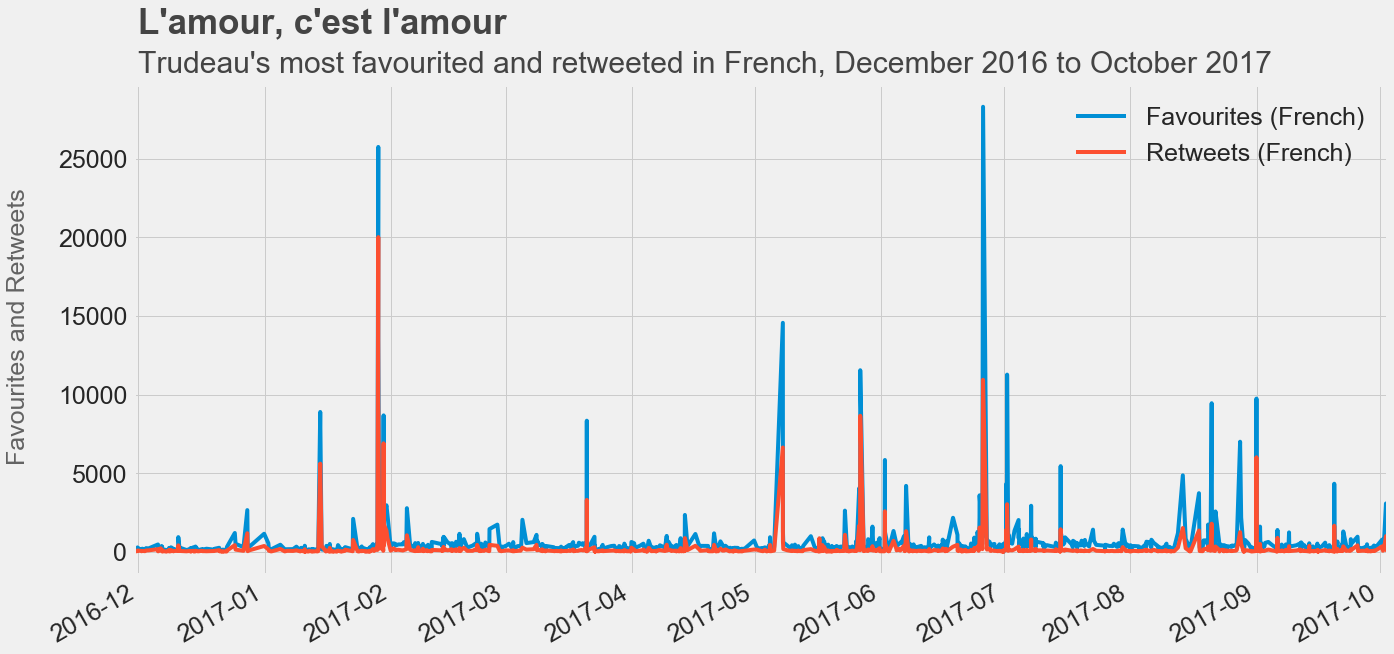

In [49]:
# French
t_fr_plot = tlikes_fr.plot(figsize = (20,10), label = "Favourites (French)", legend = True)
trt_fr.plot(figsize = (20,10), label = "Retweets (French)", legend = True, ax = t_fr_plot)
t_fr_plot.text(x = "2016-12", y = 33000, s = "L'amour, c'est l'amour",
                 fontsize = 35, alpha = 0.85, weight = "bold")
t_fr_plot.text(x = "2016-12", y = 30500,
               s = "Trudeau's most favourited and retweeted in French, December 2016 to October 2017",
               fontsize = 30, alpha = 0.85 )
t_fr_plot.tick_params(labelsize = 25)
t_fr_plot.text(x = "2016-10-30", y = 22000, s = "Favourites and Retweets", fontsize = 25, rotation = "vertical", alpha = 0.7)
t_fr_plot.legend(fontsize = 25, loc = 1, ncol = 1)
t_fr_plot.xaxis.label.set_visible(False)

Again, we knew that "L'amour, c'est l'amour. #PrideTO" got the most favourites, at 28302. It's interesting to see that the tweet on welcoming refugees got more retweets in French. Next, let's look at the source of the tweets.

In [50]:
# Helper methods

def get_source(data):
    sources = []
    for source in data["Source"]:
        if source not in sources:
            sources.append(source)
    return sources

# numpy vector mapped to labels
def source_percentage(data, sources):
    percent = np.zeros(len(sources))
    for source in data["Source"]:
        for index in range(len(sources)):
            if source == sources[index]:
                percent[index] += 1
                pass
    percent = percent / 100
    return percent

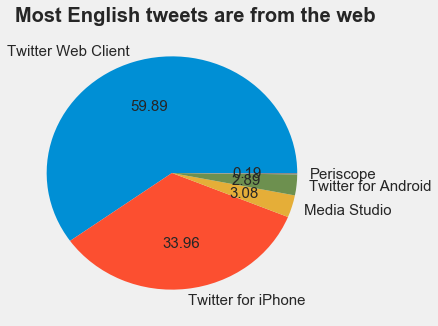

In [51]:
# Now let's actually get the sources
sources_en = get_source(data_en)
sources_fr = get_source(data_fr)
percent_en = source_percentage(data_en, sources_en)
percent_fr = source_percentage(data_fr, sources_fr)

# Plot the pie chart for English tweets first
pie_chart_en = pd.Series(percent_en, index=sources_en, name = '')
pie_en = pie_chart_en.plot.pie(fontsize= 15, autopct='%.2f', figsize=(5, 5), legend = False);
pie_en.set_title("Most English tweets are from the web", weight = "bold", loc = "left")

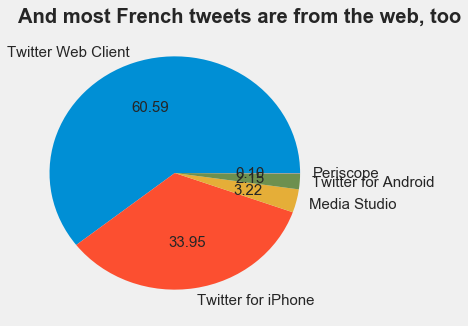

In [52]:
# Let's check out the source of the French tweets too
pie_chart_fr = pd.Series(percent_fr, index = sources_fr, name = "")
pie_fr = pie_chart_fr.plot.pie(fontsize = 15, autopct = "%.2f", figsize = (5,5), legend = False);
pie_fr.set_title("And most French tweets are from the web, too", weight = "bold", loc = "left")

Nothing too crazy here- the majority of tweets are from the Twitter web client in both languages. For some reason, the percentages are slightly different in French versus English- I think this could be due to the filtering/cleaning I did, or just due to what Trudeau tweeted. 

Now that we've did a bit of basic statistical exploration, let's look at the sentiment.

In [53]:
# Now time to analyze the sentiment
# We'll start with using VADER and the try using TextBlob
# Not sure how well VADER works for French, but TextBlob-Fr works for French for sure!

# 1. VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sent_vader(tweet):

    get_sentiment = SentimentIntensityAnalyzer()
    sentiment = get_sentiment.polarity_scores(tweet) 
    return sentiment["compound"]

# 2. TextBlob

from textblob import TextBlob

def textblob_en(tweet):
    
    txt_blob = TextBlob(tweet)
    return txt_blob.sentiment.polarity

# French- returns a tuple (polarity, subjectivity)
# For some reason this is different than the English version
from textblob_fr import PatternTagger, PatternAnalyzer

def textblob_fr(tweet):
    
    txt_blob = TextBlob(tweet, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    return txt_blob.sentiment[0]

In [54]:
# Get the sentiment in both languages
sent_col = data_en["Tweets"].apply(sent_vader)
data_en = data_en.assign(VADER = sent_col)
sent_col = data_fr["Tweets"].apply(sent_vader)
data_fr = data_fr.assign(VADER = sent_col)

# Time series for plotting
vader_en = pd.Series(data = data_en['VADER'].values, index = data_en["Date"])
vader_fr = pd.Series(data = data_fr['VADER'].values, index = data_fr["Date"])

In [55]:
# Get the mean sentiment from December 2016 to September 2017
vader_en_mean = data_en["VADER"].mean()
vader_fr_mean = data_fr["VADER"].mean()
print("Mean sentiment for English tweets using VADER: " + str(vader_en_mean))
print("Mean sentiment for French tweets using VADER: " + str(vader_fr_mean))

Mean sentiment for English tweets using VADER: 0.4558063432835826
Mean sentiment for French tweets using VADER: 0.04087931707317075


Trudeau's English tweets seem to be much more positive than his French ones!

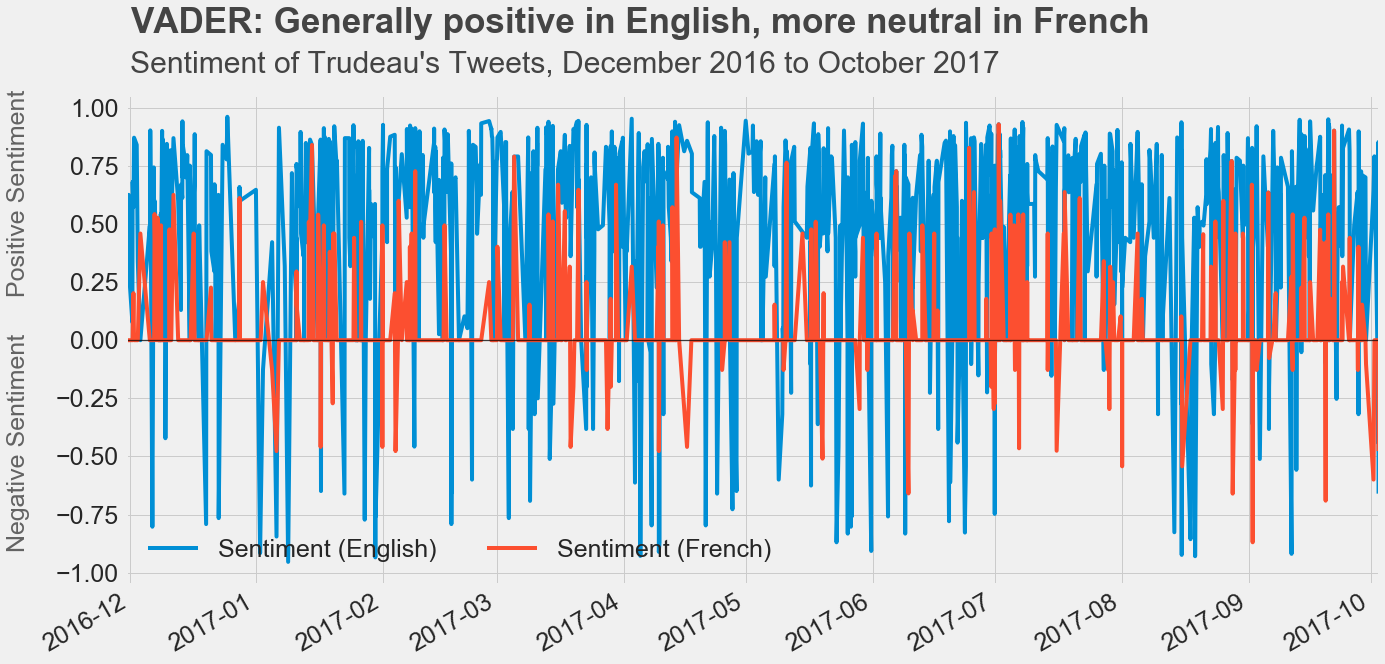

In [56]:
# Let's look at the sentiment of tweets in English and French, according to VADER
vader_plot = vader_en.plot(figsize=(20,10), label = "Sentiment (English)", legend = True)
vader_fr.plot(figsize=(20,10), label = "Sentiment (French)", legend = True)
vader_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
vader_plot.text(x = "2016-12", y = "1.32", 
               s = 'VADER: Generally positive in English, more neutral in French', 
                fontsize = 35, alpha = .85, weight = "bold")
vader_plot.text(x = "2016-12", y = "1.15", 
               s = 'Sentiment of Trudeau\'s Tweets, December 2016 to October 2017', fontsize = 30, alpha = .85)
vader_plot.xaxis.label.set_visible(False)
vader_plot.tick_params(labelsize = 25)
vader_plot.text(x = "2016-11", y = -0.05, s = "Negative Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
vader_plot.text(x = "2016-11", y = 1, s = "Positive Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
vader_plot.legend(fontsize = 25, loc = 3, ncol = 2)

In [57]:
# Now TextBlob

# English
sent_col = data_en["Tweets"].apply(textblob_en)
data_en = data_en.assign(TextBlob = sent_col)
# French
sent_col = data_fr["Tweets"].apply(textblob_fr)
data_fr = data_fr.assign(TextBlob = sent_col)

# Time series for plotting
textblob_en = pd.Series(data = data_en['TextBlob'].values, index = data_en["Date"])
textblob_fr = pd.Series(data = data_fr['TextBlob'].values, index = data_fr["Date"])

In [58]:
# Get mean sentiment in both languages
textblob_en_mean = data_en["TextBlob"].mean()
textblob_fr_mean = data_fr["TextBlob"].mean()
print("Mean sentiment for English tweets using TextBlob: " + str(textblob_en_mean))
print("Mean sentiment for French tweets using TextBlob: " + str(textblob_fr_mean))

Mean sentiment for English tweets using TextBlob: 0.23905401508925836
Mean sentiment for French tweets using TextBlob: 0.18829283302063815


The mean sentiment of tweets in both languages are much closer according to TextBlob than VADER. Maybe this could be because I used TextBlob-Fr that actually is made for French, so it could be more accurate.

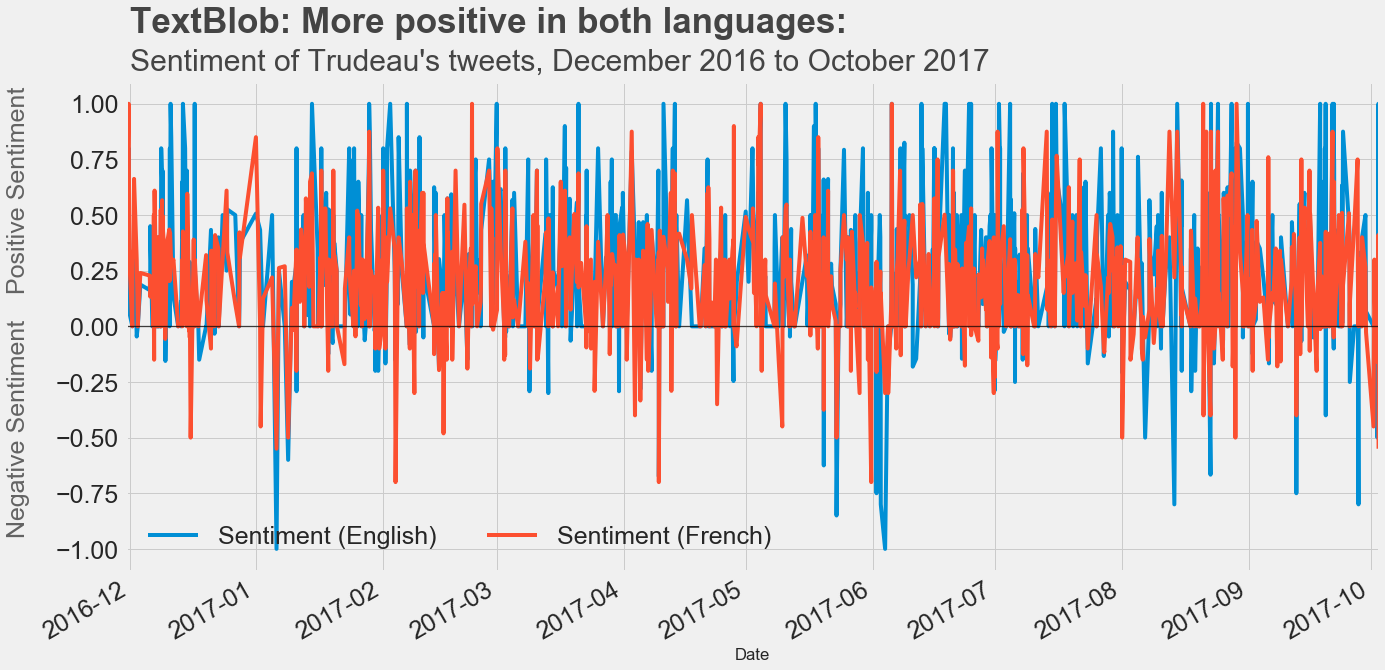

In [59]:
# Let's look at the sentiment of tweets in English and French, according to TextBlob
textblob_plot = textblob_en.plot(figsize=(20,10), label = "Sentiment (English)", legend = True)
textblob_fr.plot(figsize=(20,10), label = "Sentiment (French)", legend = True)
textblob_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
textblob_plot.text(x = "2016-12", y = "1.32", 
               s = 'TextBlob: More positive in both languages:', fontsize = 35, alpha = .85, weight = "bold")
textblob_plot.text(x = "2016-12", y = "1.15", 
               s = 'Sentiment of Trudeau\'s tweets, December 2016 to October 2017', fontsize = 30, alpha = .85)
textblob_plot.tick_params(labelsize = 25)
textblob_plot.text(x = "2016-11", y = -0.05, s = "Negative Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
textblob_plot.text(x = "2016-11", y = 1, s = "Positive Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
textblob_plot.legend(fontsize = 25, loc = 3, ncol = 2)

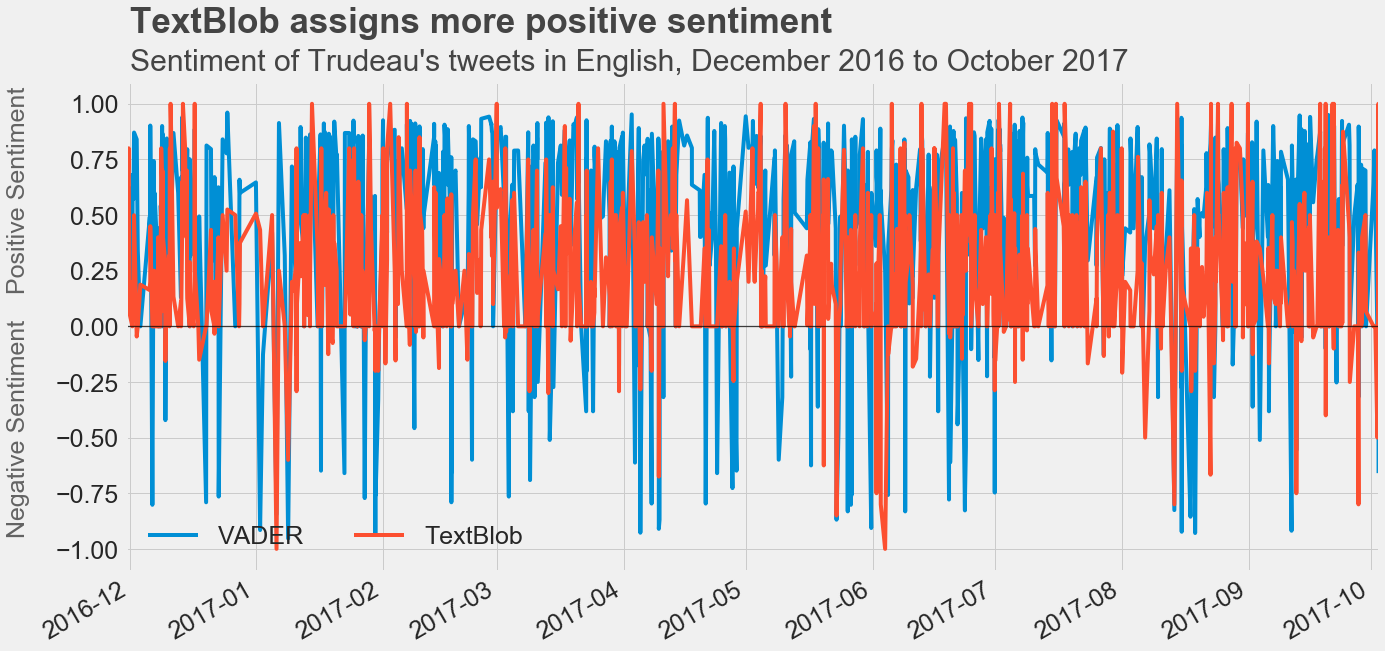

In [60]:
# Textblob seems to assign more positive sentiment to tweets than VADER- I wonder why?

# Let's compare the output of VADER and textblob for English, and then for French
en_plot = vader_en.plot(figsize=(20,10), label = "VADER", legend = True)
textblob_en.plot(figsize=(20,10), label = "TextBlob", legend = True)
en_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
en_plot.text(x = "2016-12", y = "1.32", 
               s = 'TextBlob assigns more positive sentiment', fontsize = 35, alpha = .85, weight = "bold")
en_plot.text(x = "2016-12", y = "1.15", 
               s = 'Sentiment of Trudeau\'s tweets in English, December 2016 to October 2017', fontsize = 30, alpha = .85)
en_plot.xaxis.label.set_visible(False)
en_plot.tick_params(labelsize = 25)
en_plot.text(x = "2016-11", y = -0.05, s = "Negative Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
en_plot.text(x = "2016-11", y = 1, s = "Positive Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
en_plot.legend(fontsize = 25, loc = 3, ncol = 2)

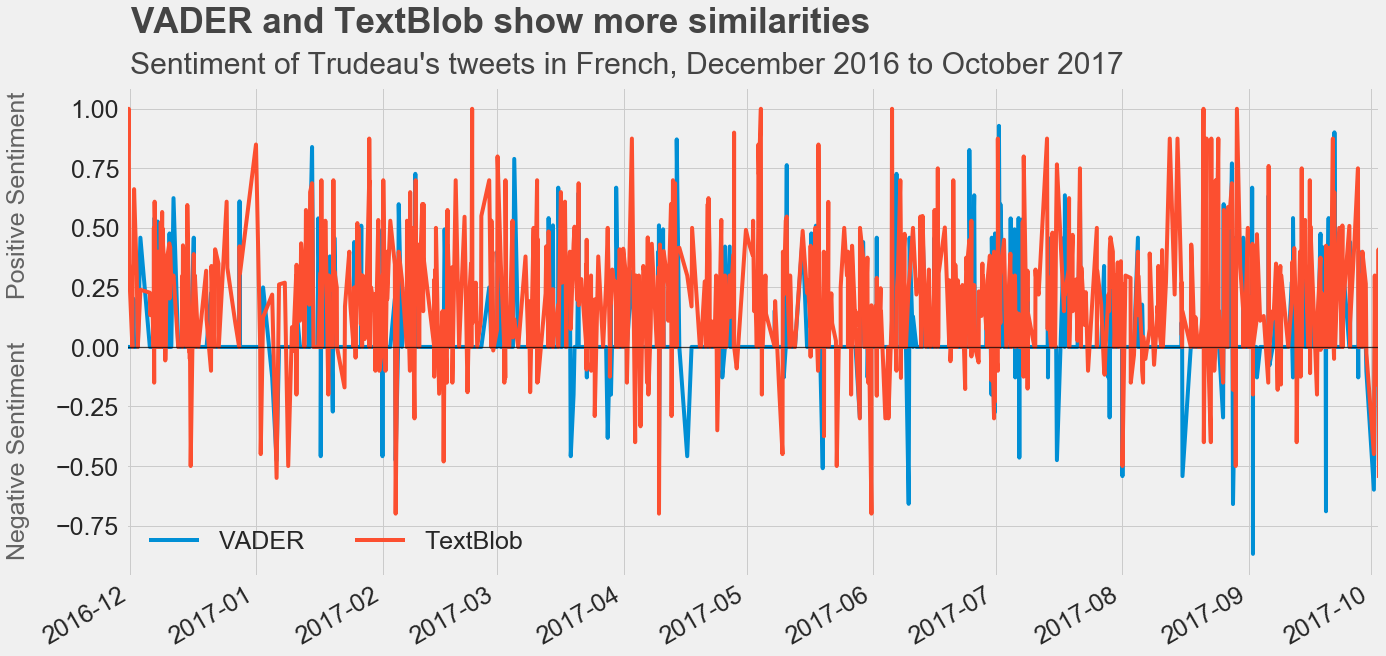

In [61]:
# French comparison of VADEr vs TextBlob
fr_plot = vader_fr.plot(figsize=(20,10), label = "VADER", legend = True)
textblob_fr.plot(figsize=(20,10), label = "TextBlob", legend = True)
fr_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fr_plot.text(x = "2016-12", y = "1.32", 
               s = 'VADER and TextBlob show more similarities', fontsize = 35, alpha = .85, weight = "bold")
fr_plot.text(x = "2016-12", y = "1.15", 
               s = 'Sentiment of Trudeau\'s tweets in French, December 2016 to October 2017', fontsize = 30, alpha = .85)
fr_plot.xaxis.label.set_visible(False)
fr_plot.tick_params(labelsize = 25)
fr_plot.text(x = "2016-11", y = -0.05, s = "Negative Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
fr_plot.text(x = "2016-11", y = 1, s = "Positive Sentiment", fontsize = 25, rotation = "vertical", alpha = 0.7)
fr_plot.legend(fontsize = 25, loc = 3, ncol = 2)

In [62]:
# Next look at sentiment per month
# Currently have a timestamp object of the form yyyy-mm-dd hh:mm:ss

# Need to group data by year, then month- so use a method
from datetime import datetime
def get_month_year(tweet_date):
    month = str(tweet_date.month)
    year = str(tweet_date.year)
    mth_yr = year + '-' + month
    return pd.to_datetime(mth_yr).strftime('%Y-%m')

# Plotting and grouping method
def monthly_sentiment(data, nlp_method):
    month_year_column = data["Date"].apply(get_month_year)
    data = data.assign(MonthYear = month_year_column)
    group = data.groupby(["MonthYear"])
    return group.aggregate({nlp_method:np.mean})

In [63]:
# Group
en_vader = monthly_sentiment(data_en, "VADER")
en_textblob = monthly_sentiment(data_en, "TextBlob")
fr_vader = monthly_sentiment(data_fr, "VADER")
fr_textblob = monthly_sentiment(data_fr, "TextBlob")
# Rename columns
en_vader.columns = ["Vader (English)"]
fr_vader.columns = ["Vader (French)"]
en_textblob.columns = ["TextBlob (English)"]
fr_textblob.columns = ["TextBlob (French)"]

In [ ]:
# Save as CSV optionally
#data_en.to_csv("Trudeau_Tweets_Oct2_English.csv", index = True)
#data_fr.to_csv("Trudeau_Tweets_Oct2_French.csv", index = True)

In [64]:
# The data is in a data frame- need to convert from pandas.core.frame.Dataframe to pandas.core.series.Series
# Not sure if this is entirely necessary
s_en_vader = en_vader.ix[:,0]
s_fr_vader = fr_vader.ix[:,0]
s_en_textblob = en_textblob.ix[:,0]
s_fr_textblob = fr_textblob.ix[:,0]

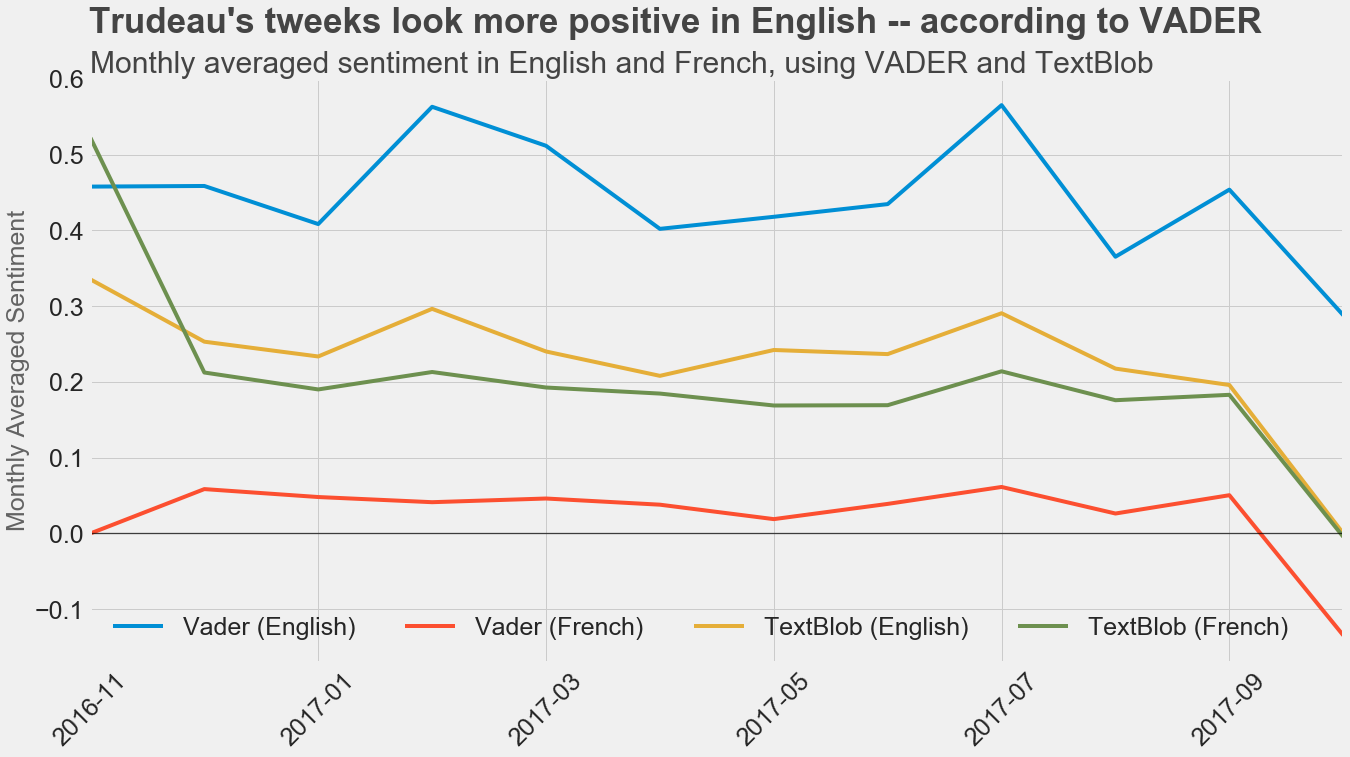

In [65]:
# Plot all together- this is essentially plotting 4 separate data frames together in one figure
# Now we can see how the sentiment of Trudeau's tweets has changed, in both languages, with both VADER and TextBlob

ax = s_en_vader.plot(figsize=(20,10), legend = True)
s_fr_vader.plot(ax=ax, legend = True)
s_en_textblob.plot(ax=ax, legend = True)
s_fr_textblob.plot(ax=ax, legend = True)
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(True)
ax.tick_params(labelsize = 25)
plt.xticks(rotation=45);
plt.suptitle("Trudeau's tweeks look more positive in English -- according to VADER    ",
             fontsize = 35, weight = "bold", alpha = 0.85)
plt.title("Monthly averaged sentiment in English and French, using VADER and TextBlob",
          alpha = 0.85, fontsize = 30, loc = "left")
ax.legend(fontsize = 25, loc = 3, ncol = 4)
ax.set_ylabel("Monthly Averaged Sentiment", fontsize = 25, alpha = 0.7)

It's interesting that the English sentiment comes across as more positive, using both VADER and TextBlob, compared to the French tweets. French is a beautiful language, but is English just more enthusiastic? Or is that just how Trudeau tends to tweet, or can this be attributed to his command of each language and what he's more used to? It's good to see that the sentiment generally follows a similar pattern, in both languages, with both text processing tools. It's also intersting to see the drop off in sentiment in October- it makes sense given the awful events that have happened in the past two days both in Edmonton and Las Vegas. We'll have to wait to see if this downward trend continues. Hopefully not! But if it does, it could say two things: First, it could be a reflection of world events. Or, it could mean Trudeau is feeling worn down as Prime Minister.